# TASK-2 


In [ ]:
#In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

# importing libraries

In [23]:
# Import the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# readind dataset

In [7]:
#Import the data

main_data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
main_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#Check for the datatypes and non-null count

main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Check for NaN values if any. If there are any, it is best to go for null value imputation rather than dropping the missing data'

main_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
main_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
main_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
main_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
print(main_data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [15]:
main_data[-2:]

,Hours,Scores
23,6.9,76
24,7.8,86


In [16]:
main_data.apply(np.max)

Hours      9.2
Scores    95.0
dtype: float64

In [17]:

main_data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

# visualising dataset

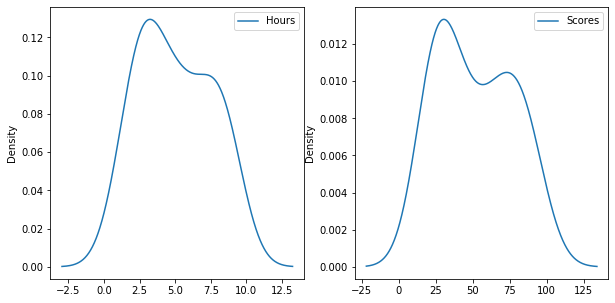

In [42]:
f,ax=plt.subplots(1,2,figsize=(10,5))
main_data.plot(kind='kde',y='Hours',ax=ax[0])
main_data.plot(kind='kde',y='Scores',ax=ax[1])

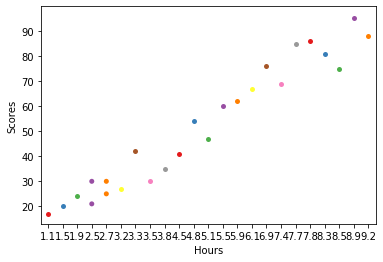

In [19]:
sb.swarmplot(x="Hours",y="Scores",data=main_data,palette="Set1",split=True)

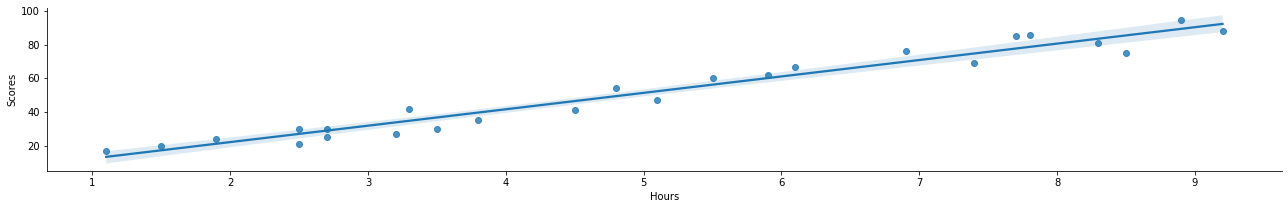

In [20]:
sb.lmplot(x="Hours",y="Scores",height=3,aspect=6,data=main_data)

# Dividing the data between labels and attributes

In [25]:
x=main_data.iloc[:, :-1].values
y=main_data.iloc[:, 1].values

# Training of model

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# Algorithm-Linear Regression


I have choosen simple Linear Regression algorithm as the dataset only contains two columns: Hours and Scores(which implies that the dataset has one dependent and one independent variable) and its linear(as per the visualizations)


In [37]:
from sklearn.linear_model import LinearRegression
a=LinearRegression()
a.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Testing Algorithm 

In [39]:
ypred=a.predict(xtest)
df1= pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Checking the accuracy of algorithm 

In [40]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9454906892105356

# Predicting score for 9.25 hours

In [41]:
Hours =[[9.25]] 
own_pred = a.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### The predicted score for 9.25 hours is 93.691